# Loading Dataset


In [113]:
import sklearn.datasets
import numpy as np

In [114]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [115]:
X = breast_cancer.data
Y = breast_cancer.target

In [116]:
print(X)
#X has sequence of features in each row
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [117]:
print(X.shape, Y.shape)

(569, 30) (569,)


In [118]:
import pandas as pd

In [119]:
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names )
##Dataframe Two-dimensional, size-mutable, potentially heterogeneous tabular data.

In [120]:
data['class'] = breast_cancer.target

In [121]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [122]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [123]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [124]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [125]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


#Test Train Split

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X = data.drop('class',axis = 1)
Y = data['class']

In [128]:
type(X)

pandas.core.frame.DataFrame

In [129]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [130]:
print(Y.shape,Y_train.shape,Y_test.shape)
#Almost 80% to training if unspecified 

(569,) (426,) (143,)


In [131]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1)

In [132]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (512, 30) (57, 30)


In [133]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,stratify = Y)

In [134]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,stratify = Y, random_state = 1)

In [135]:
print(Y.mean(),Y_train.mean(),Y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


In [136]:
print(X.mean(),X_train.mean(),X_test.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

#Binarization of Input

In [137]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

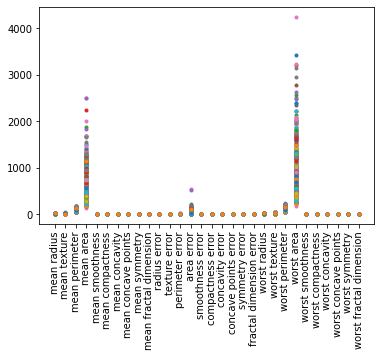

In [138]:
plt.plot(X_train.T, '.')
plt.xticks(rotation = 'vertical')
plt.show

In [139]:
X_binarised_3_train = X_train['mean area'].map(lambda x:0 if x<1000 else 1)

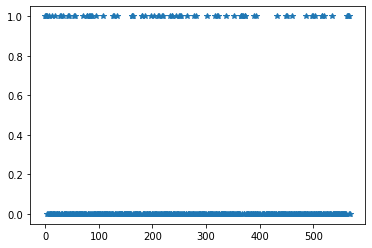

In [140]:
plt.plot(X_binarised_3_train, '*')

In [141]:
#Binarisation of all the columns together using pd.cut

X_binarised_train = X_train.apply(pd.cut, bins = 2, labels = [1,0])

<function matplotlib.pyplot.show>

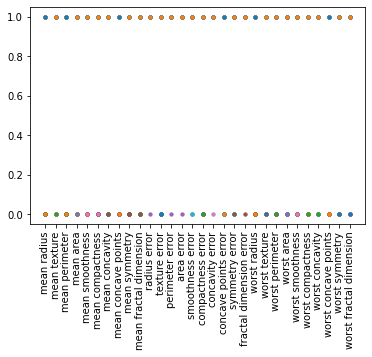

In [142]:
plt.plot(X_binarised_train.T, '.')
plt.xticks(rotation = 'vertical')
plt.show

In [143]:
X_binarised_test = X_test.apply(pd.cut, bins = 2, labels = [1,0])

In [144]:
#Convert to Numpy Arrays
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

In [145]:
type(X_binarised_test)

numpy.ndarray

#MP Neuron Model

In [146]:
from random import randint
b = 3
#Our goal is to maximise the number of cases in which the value we get the answer correct and we need to find the value of b for which accuracy accross all rows is maximised
i = randint(0,X_binarised_train.shape[0])
print('For row', i)
if(np.sum(X_binarised_train[100,:])>=b):
  print('MP Neuron inference is malignant')
else:
  print('MP Neuron inference is benign')
if(Y_train[i]==1):
  print('MP Neuron inference is malignant')
else:
  print('MP Neuron inference is benign')


For row 232
MP Neuron inference is malignant
MP Neuron inference is malignant


In [147]:
b =3
Y_pred_train = []
accurate_rows = 1

for x,y in zip(X_binarised_train,Y_train):
  y_pred = (np.sum(x)>=b)
  Y_pred_train.append(y_pred) 
  accurate_rows+= (y==y_pred)

print(accurate_rows,accurate_rows/X_binarised_train.shape[0])

322 0.62890625


In [148]:
for b in range(X_binarised_train.shape[1]+1):
  Y_pred_train = []
  accurate_rows = 1
  for x,y in zip(X_binarised_train,Y_train):
    y_pred = (np.sum(x)>=b)
    Y_pred_train.append(y_pred)
    accurate_rows+= (y==y_pred)
  print(b,accurate_rows/X_binarised_train.shape[0])

0 0.62890625
1 0.62890625
2 0.62890625
3 0.62890625
4 0.62890625
5 0.62890625
6 0.62890625
7 0.62890625
8 0.62890625
9 0.62890625
10 0.62890625
11 0.62890625
12 0.62890625
13 0.62890625
14 0.6328125
15 0.634765625
16 0.64453125
17 0.650390625
18 0.658203125
19 0.666015625
20 0.673828125
21 0.689453125
22 0.703125
23 0.7265625
24 0.7578125
25 0.787109375
26 0.8203125
27 0.84765625
28 0.8515625
29 0.81640625
30 0.76171875


In [149]:
from sklearn.metrics import accuracy_score

In [150]:
  b = 28
  
  Y_pred_test = []
  accurate_rows = 1
  for x in X_binarised_test:
    y_pred = (np.sum(x)>=b)
    Y_pred_test.append(y_pred)
    
  accuracy = accuracy_score(Y_pred_test,Y_test)
  print(b,accuracy)

28 0.7894736842105263


#MP Neuron Class


In [151]:
class MPNeuron:
  def __init__(self):
    self.b = None
  def model(self,x):
    return (sum(x)>=self.b)

  def predict(self,X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y):
    accuracy = {}

    for b in range(X.shape[1]+1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred,Y)
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b

    print('Optimal value of b is', best_b)
    print('Highest accuracy is',accuracy[best_b])

In [152]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train, Y_train)

Optimal value of b is 28
Highest accuracy is 0.849609375


In [153]:
Y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)

In [154]:
print(accuracy_test)

0.7894736842105263


#Perceptron

$y=1,\mbox{if}\sum_i w_i x_i>=b $

$y = 0,\mbox{otherwise}$



In [155]:
X_train = X_train.values
X_test = X_test.values

In [156]:
class Perceptron:
  def __init__(self):
    self.w = None
    self.b = None

  def model(self,x):
    return 1 if (np.dot(self.w,x)>=self.b) else 0

  def predict(self,X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y,epochs=1,lr =1):

    self.w = np.ones(X.shape[1])
    self.b = 0

    accuracy = {}
    max_accuracy = 0

    wt_matrix = []

    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred = self.model(x)
        if y==1 and y_pred==0:
          self.w = self.w +lr*x
          self.b = self.b +lr*1
        elif y==0 and y_pred==1:
          self.w = self.w -lr*x
          self.b = self.b -lr*1
      
      wt_matrix.append(self.w)

      accuracy[i] = accuracy_score(self.predict(X),Y)
      if(accuracy[i]>max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
    #Concept of Checkpointing is that we keep track of the best model we have seen so far and saving that and now restoring
    self.w = chkptw
    self.b = chkptb
    print(max_accuracy)

    plt.plot(list(accuracy.values()))
    plt.ylim([0,1])
    plt.show()

    return np.array(wt_matrix)


In [157]:
perceptron = Perceptron()

0.927734375


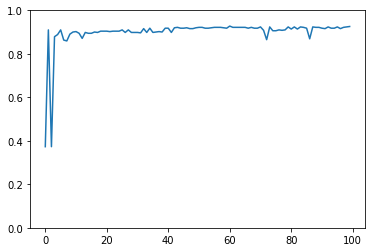

In [158]:
wt_matrix = perceptron.fit(X_train,Y_train,100)

In [159]:
type(wt_matrix)

numpy.ndarray

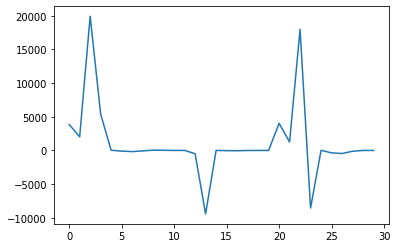

In [160]:
plt.plot(perceptron.w)
plt.show()

In [161]:
Y_pred_train = perceptron.predict(X_train)
print(accuracy_score(Y_pred_train,Y_train))

0.927734375


In [162]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test,Y_test))

0.9473684210526315


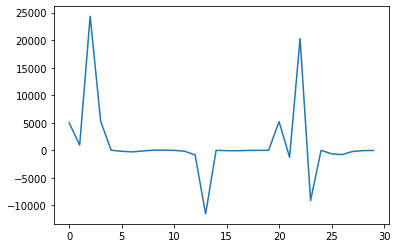

In [163]:
plt.plot(wt_matrix[-1,:])
plt.show()

In [164]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML


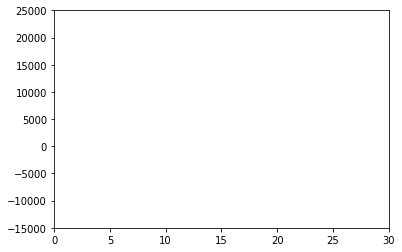

In [165]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-15000, 25000))

line, = ax.plot([], [], lw=2)

In [166]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i,:]
    line.set_data(x, y)
    return (line,)

In [167]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,frames=100, interval=100, blit=True)

In [168]:
HTML(anim.to_html5_video())